# Exploratory Data Analysis(EDA) on Retail Sales Data

# Objective: In this project,a dataset containing information about retail sales. The goal is to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that canhelp the retail business make informed decisions

# Step 1: Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline 
%matplotlib inline

# Step 2: Load the Dataset

In [38]:
df = pd.read_csv('retail_sales_dataset.csv')   # <-- update if path differs
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Step 3: Data Cleaning

In [40]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows: ", df.duplicated().sum())

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Verify conversion
print("\nInvalid Dates: ", df['Date'].isnull().sum())



Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Duplicate Rows:  0

Invalid Dates:  0


# Step 4: Descriptive Statistics

In [42]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.0

# Step 5: Time Series Analysis

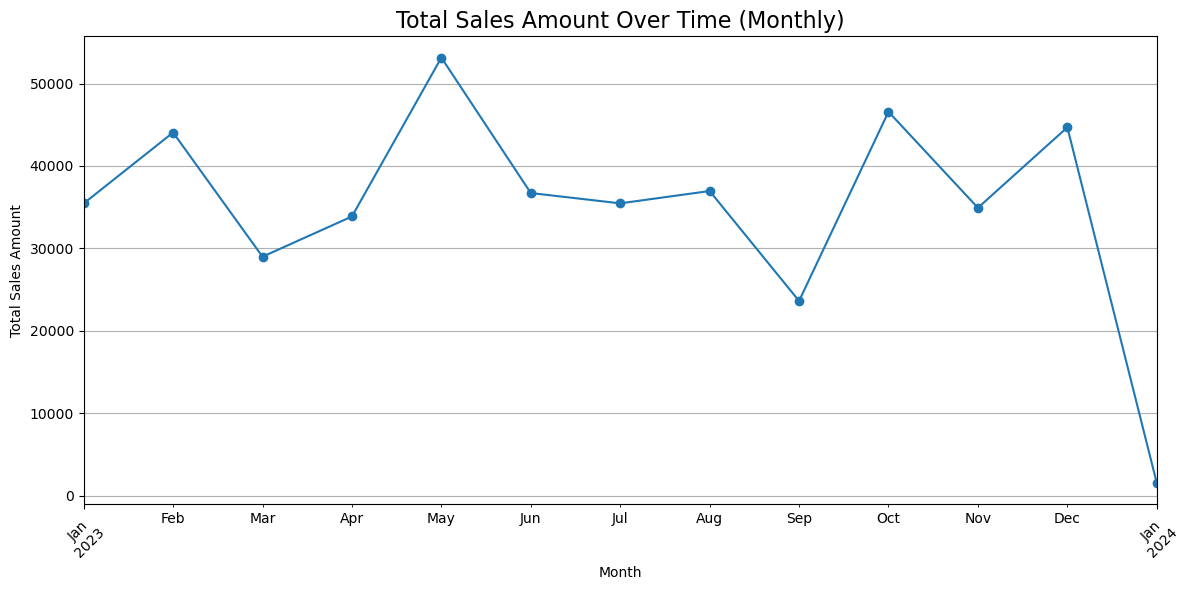

In [44]:
# Group by Month & Plot Total Sales
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Total Sales Amount Over Time (Monthly)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Product Category Analysis

C:\Users\parsh\AppData\Local\Temp\ipykernel_15840\1934973812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')


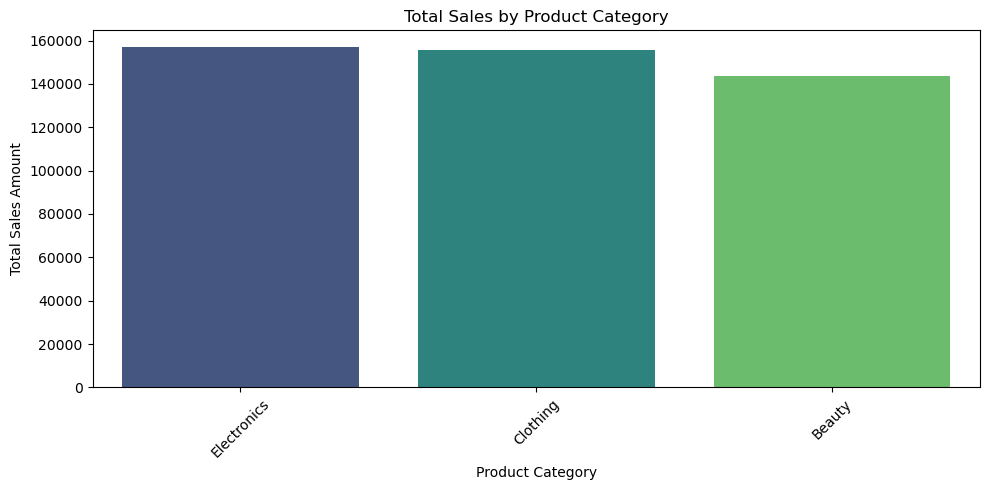

In [46]:
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Top Customers Analysis

C:\Users\parsh\AppData\Local\Temp\ipykernel_15840\3112045718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma')


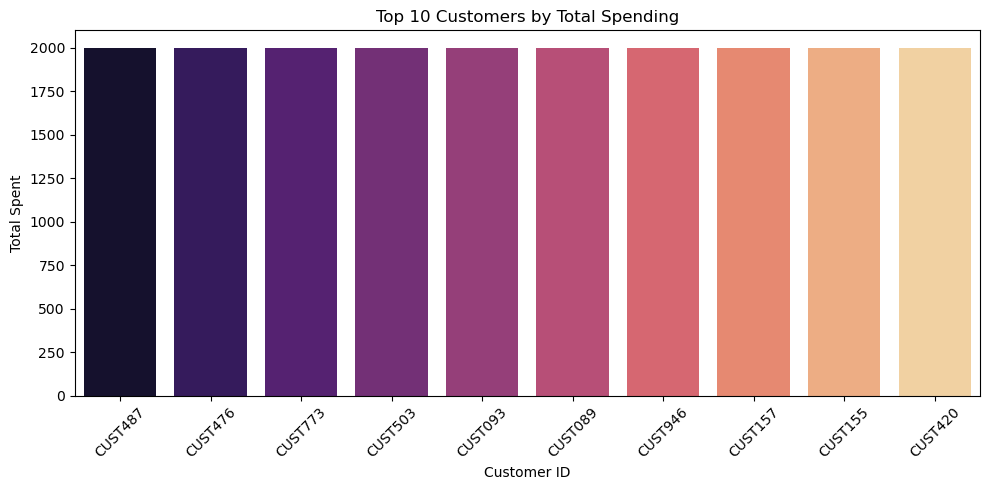

In [48]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Age Distribution of Customers

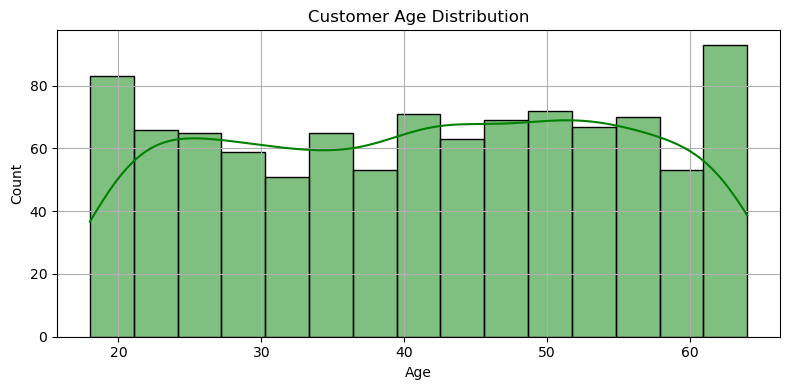

In [50]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=15, kde=True, color='green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 9: Heatmap for Correlation

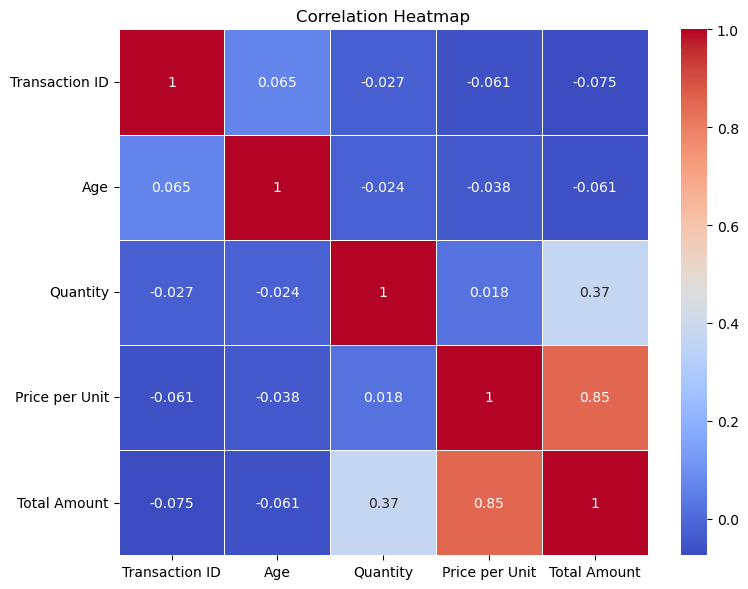

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Step 10: Recommendations Summary

In [54]:
print("""
✅ Top-selling Product Category: {}
✅ Highest-spending Customer: {}
🧠 Recommendations:
1. Increase stock for high-performing products.
2. Offer loyalty programs to top 5% customers.
3. Launch targeted campaigns for seasonal peaks.
""".format(
    product_sales.idxmax(),
    top_customers.idxmax()
))


✅ Top-selling Product Category: Electronics
✅ Highest-spending Customer: CUST487
🧠 Recommendations:
1. Increase stock for high-performing products.
2. Offer loyalty programs to top 5% customers.
3. Launch targeted campaigns for seasonal peaks.

